# Assignment Five

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./agaricus-lepiota.data');

In [3]:
df.head()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df['edibility'].describe()

count     8124
unique       2
top          e
freq      4208
Name: edibility, dtype: object

In [5]:
p = df.loc[df['edibility'] == 'p']['edibility'].count() 
e = df.loc[df['edibility'] == 'e']['edibility'].count()

print(f'Poisonous: {p} Edible: {e} Total: {p+e}')

Poisonous: 3916 Edible: 4208 Total: 8124


#### 4.  Habitat distributed between edibility vs non-edibility

Different habitats and their counts. Each habitat divided into edible and poisonous
d = woods, g = grasses, l = leaves, m = meadows, p = paths, u = urban, w = waste


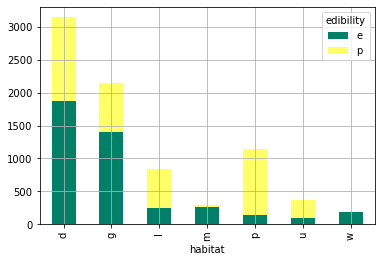

In [6]:
df_grouped = df.groupby(['habitat', 'edibility'])['edibility'].count()
df_grouped.unstack().plot(kind='bar', stacked=True, colormap='summer', grid=True)
print('Different habitats and their counts. Each habitat divided into edible and poisonous')
print('d = woods, g = grasses, l = leaves, m = meadows, p = paths, u = urban, w = waste')

#### 5. Convert features to dummy variables

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_dummy = pd.read_csv('./agaricus-lepiota.data')

In [8]:
# Drop veil-color as as values are equal
df_dummy = df_dummy.drop(['veil-color'], axis=1)

In [9]:
df_dummy = pd.get_dummies(df_dummy)
df_dummy.head()

,edibility_e,edibility_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


#### 6. Visualise the feature space

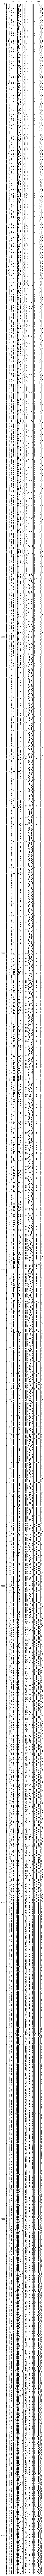

In [10]:
plt.figure(figsize=(300, 300))
plt.spy(df_dummy)